In [1]:
# TASK 8
# FAKE NEWS PREDICTION
# • The Fake News Prediction Dataset features both real and fake news, providing a
# basis for predictive modeling to identify misinformation. With columns including
# Title, Text, and Label (Fake or Real), it addresses the pervasive issue of false or
# misleading information in news.
# • The dataset supports efforts to enhance information integrity, combat fake news,
# and promote media literacy

In [4]:
import pandas as pd
news=pd.read_csv("D:\\intership\\cognoriseinfotech\\TASK 8 FAKE NEWS PREDICTION\\news.csv");
news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
news.shape

(6335, 4)

In [6]:
news.columns


Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [7]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [8]:
news.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [9]:
news.count()

Unnamed: 0    6335
title         6335
text          6335
label         6335
dtype: int64

In [12]:
news.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [13]:
# Basic statistics


# Value counts of labels
label_counts = news['label'].value_counts()
print(label_counts)



label
REAL    3171
FAKE    3164
Name: count, dtype: int64


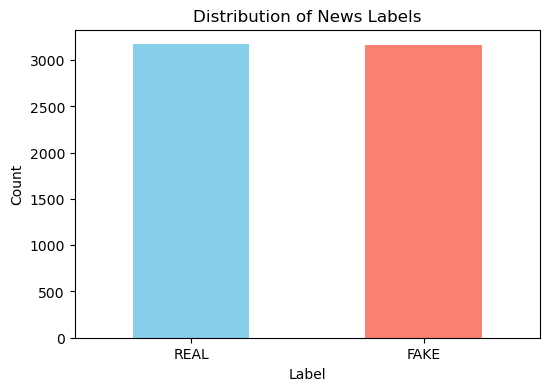

In [14]:

# Plotting the distribution of labels
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
news['label'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of News Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

fake_titles = ' '.join(news[news['label'] == 'Fake']['title'].values)
if len(fake_titles) > 0:
    generate_wordcloud(fake_titles, 'Word Cloud for Fake News Titles')
else:
    print("No fake news titles found.")

real_titles = ' '.join(news[news['label'] == 'Real']['title'].values)
if len(real_titles) > 0:
    generate_wordcloud(real_titles, 'Word Cloud for Real News Titles')
else:
    print("No real news titles found.")
fake_text = ' '.join(news[news['label'] == 'Fake']['text'].values)
if len(fake_text) > 0:
    generate_wordcloud(fake_text, 'Word Cloud for Fake News Text')
else:
    print("No fake news text found.")

real_text = ' '.join(news[news['label'] == 'Real']['text'].values)
if len(real_text) > 0:
    generate_wordcloud(real_text, 'Word Cloud for Real News Text')
else:
    print("No real news text found.")


No fake news titles found.
No real news titles found.
No fake news text found.
No real news text found.


In [16]:
pip install  wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 487.6 kB/s eta 0:00:01
   ------------------------- -------------- 194.6/300.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.3 MB/s eta 0:00:00


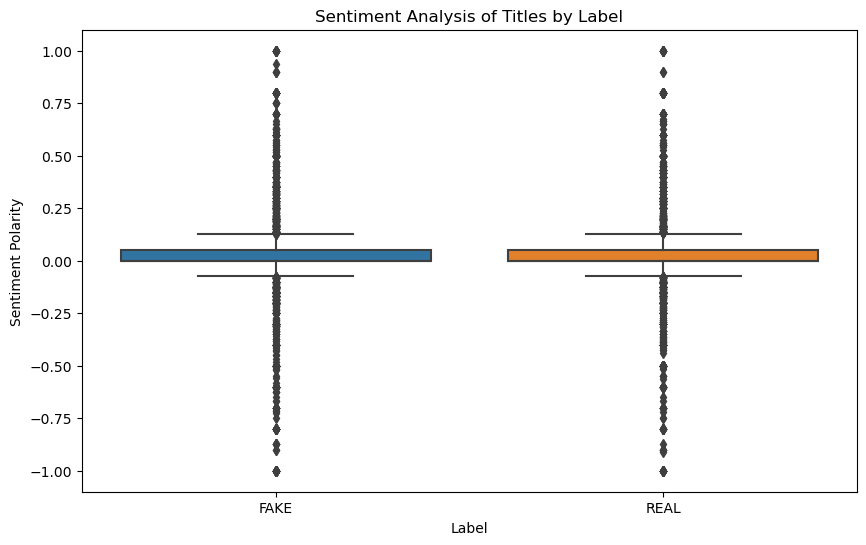

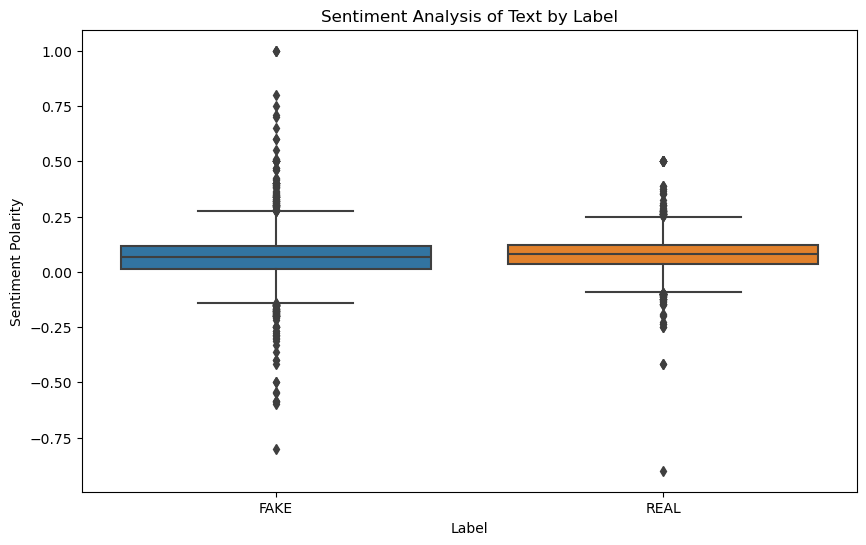

In [20]:
from textblob import TextBlob

def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity


news['title_sentiment'] = news['title'].apply(calculate_sentiment)
news['text_sentiment'] = news['text'].apply(calculate_sentiment)


import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='title_sentiment', data=news)
plt.title('Sentiment Analysis of Titles by Label')
plt.xlabel('Label')
plt.ylabel('Sentiment Polarity')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_sentiment', data=news)
plt.title('Sentiment Analysis of Text by Label')
plt.xlabel('Label')
plt.ylabel('Sentiment Polarity')
plt.show()
